# Data Mining Dylan

*Which places does Dylan sing about the most?*

- For named entity recognition code, see `find_cities.ipynb`
- For web scraping code, see `dylan_scraper.py`

In [1]:
import pandas as pd
import folium
import altair
from analysis import tidy_table

In [2]:
# Load city data from file
city_df = pd.read_json('data/city_counts.json')
songs_df = pd.read_json('data/songs.json')

In [3]:
# Make tidy versions
city_tidy = tidy_table(city_df, ['songs'])
songs_tidy = tidy_table(songs_df, ['albums'])
df = pd.merge(city_tidy, songs_tidy, left_on='song', right_on='title')

## A bar chart

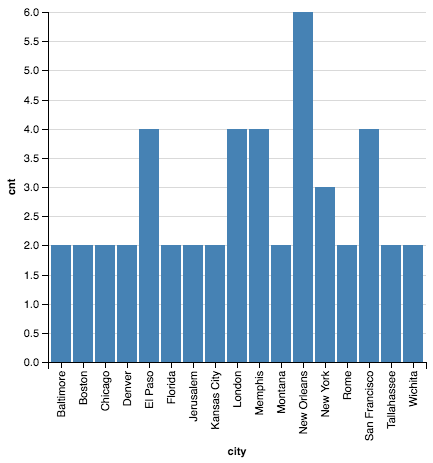

In [4]:
altair.Chart(city_df.query('cnt > 1')).mark_bar().encode(
    x='city', y='cnt')

## A Map

In [5]:
import ipywidgets as widgets

In [6]:
from viz_tools import get_place_selector, make_map

In [7]:
view = get_place_selector(city_df, songs_df)

In [8]:
view

### Folium

In [9]:
from folium import plugins

In [10]:
folium_map = folium.Map(
    location=(city_df.lat.median(), city_df.lng.median()),
    zoom_start=2)

popup_text = ("{}<br>"
              "Count: {}<br>")

for idx, row in city_df.iterrows():
    folium.CircleMarker(
        location=(row.lat, row.lng),
        radius=row.cnt,
        color="green",
        fill=True,
        popup=folium.Popup(
            html=popup_text.format(row.city, row.cnt),
            max_width=1000) 
    ).add_to(folium_map)

folium_map

### Ipyleaflet

In [11]:
from ipyleaflet import (
    Map,
    Marker, MarkerCluster,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

In [ ]:
center = [34.6252978589571, -77.34580993652344]
zoom = 10

In [ ]:
m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)

cm = CircleMarker(
    location=m.center, radius=30, weight=2,
    color='#F00', opacity=1.0, fill_opacity=1.0,
    fill_color='#0F0')

def handle_marker(change):
    print(change)

cm.observe(handle_marker)

In [ ]:
m.add_layer(cm)

In [ ]:
m

In [ ]:
m.layers